# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Problem 5, Chap 1

In [1]:
import numpy as np

In [2]:
def true_event(sequence):
    if (np.sum(sequence) == 2):
        if (sequence[-1] == 1):
            return 1
    return 0

In [4]:
k = 4
x = np.random.randint(0,2,size=k)
print(x)
true_event(x)

[0 1 1 0]


0

In [5]:
def true_event_vector(sequence):
    return (np.sum(x,axis=1) == 2)*(x[:,-1] == 1)

In [6]:
k = 4

In [7]:
x = np.random.randint(0,2,size=(100,k))

In [8]:
np.mean(true_event_vector(x))

0.15

In [36]:
(k-1)*((1/2)**k)

0.1875

## Problem 10, Chap 1

In [9]:
import numpy as np

In [15]:
door = np.random.randint(1,4,size=1000)
np.mean(door == 1) # Probability when not switching


0.322

In [13]:
from random import randint
host = [] # Door opened by host
for d in door:
    if (d == 1):
        # Randomly open either 2 or 3
        host.append(randint(2,3))
    elif (d == 2):
        host.append(3)
    elif (d == 3):
        host.append(2)

In [16]:
switch_success = [] # If switching was a success
for d,h in zip(door,host):
    if (h == 2) and d==3: # Switching from 1 to 3 was a success
        switch_success.append(1)
    elif (h == 3) and d==2: # Switching from 1 to 2 was a success
        switch_success.append(1)
    else:
        switch_success.append(0)

In [17]:
np.mean(switch_success)

0.356

## Some fun with text

In [18]:
import numpy as np
with open('data/pride_and_prejudice.txt',mode='r') as f:
    txt = f.read()

In [19]:
print(txt[:1000])

The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Pride and Prejudice

Author: Jane Austen

Posting Date: August 26, 2008 [EBook #1342]
Release Date: June, 1998
Last Updated: March 10, 2018

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***




Produced by Anonymous Volunteers





PRIDE AND PREJUDICE

By Jane Austen



Chapter 1


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the right


In [30]:
letters = [l.lower() for l in txt if l.isalpha()]

In [ ]:
# Lets convert everthing to numbers for processing

In [21]:
ord('h')

104

In [22]:
chr(104)

'h'

In [23]:
ascii_ = [ord(l) for l in letters]

In [24]:
from Utils import makeEMF

In [25]:
emf = makeEMF(ascii_)

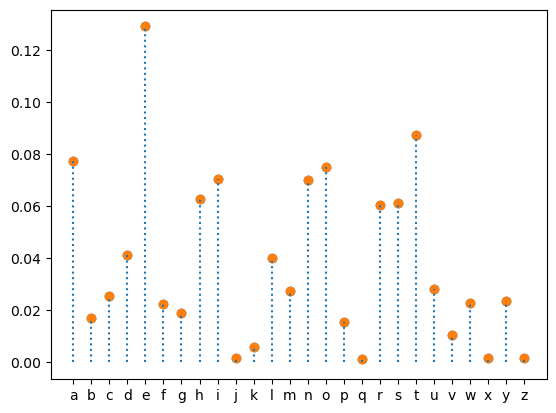

In [26]:
from Utils import plotEMF
plotEMF(emf,force_display=False)
import matplotlib.pyplot as plt
_=plt.xticks(emf[:,0],[chr(int(i)) for i in emf[:,0]])

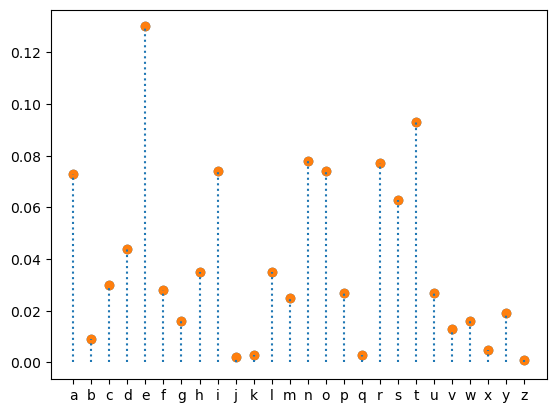

In [27]:
alphaRelFreqs = [73/1000,9/1000,30/1000,44/1000,130/1000,28/1000,16/1000,35/1000,74/1000,
                 2/1000,3/1000,35/1000, 25/1000,78/1000,74/1000,27/1000,3/1000,77/1000,63/1000,
                 93/1000,27/1000,13/1000,16/1000,5/1000,19/1000,1/1000]
plotEMF(list(zip(emf[:,0],alphaRelFreqs)),force_display=False)
_=plt.xticks(emf[:,0],[chr(int(i)) for i in emf[:,0]])

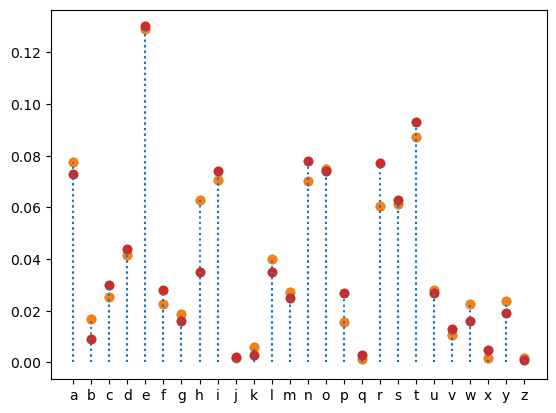

In [28]:
plotEMF(emf,force_display=False)
plotEMF(list(zip(emf[:,0],alphaRelFreqs)),force_display=False)
_=plt.xticks(emf[:,0],[chr(int(i)) for i in emf[:,0]])

In [31]:
alphabet = sorted(list(set(letters)))
shuffled_alphabet = alphabet.copy()
np.random.shuffle(shuffled_alphabet)

In [32]:
encryption = dict(zip(alphabet,shuffled_alphabet))

In [33]:
encrypted_text = ''.join([encryption.get(a.lower(),a) for a in txt])
print(encrypted_text[:200])

zth caedhmz rxzhwihar hieek eo calgh swg cahdxglmh, in dswh sxyzhw

ztly hieek ly oea zth xyh eo swnewh swnfthah sz we meyz swg flzt
sbjeyz we ahyzalmzlewy ftszyehpha.  nex jsn mecn lz, rlph lz sfsn 


In [34]:
letters_2 = [l.lower() for l in encrypted_text if l.isalpha()]

In [35]:
ascii_2 = [ord(l) for l in letters_2]

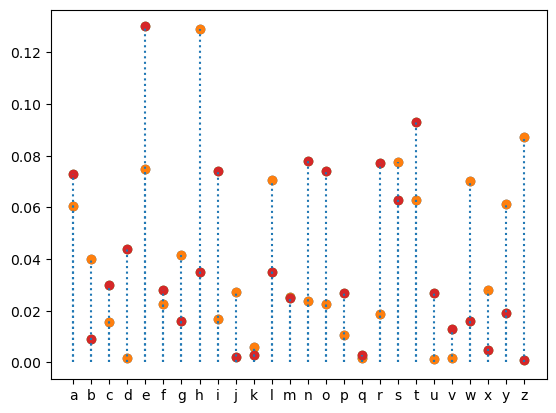

In [36]:
emf2 = makeEMF(ascii_2)
from Utils import plotEMF
plotEMF(emf2,force_display=False)
import matplotlib.pyplot as plt
_=plt.xticks(emf2[:,0],[chr(int(i)) for i in emf2[:,0]])
alphaRelFreqs = [73/1000,9/1000,30/1000,44/1000,130/1000,28/1000,16/1000,35/1000,74/1000,
                 2/1000,3/1000,35/1000, 25/1000,78/1000,74/1000,27/1000,3/1000,77/1000,63/1000,
                 93/1000,27/1000,13/1000,16/1000,5/1000,19/1000,1/1000]
plotEMF(list(zip(emf[:,0],alphaRelFreqs)),force_display=False)
_=plt.xticks(emf[:,0],[chr(int(i)) for i in emf[:,0]])

In [37]:
from Utils import makeFreq
sorted(makeFreq([''.join(l) for l in list(zip(letters[10000:-1],letters[10001:]))]),key=lambda x: int(x[1]),reverse=True)

[array(['th', '15079'], dtype='<U21'),
 array(['he', '14896'], dtype='<U21'),
 array(['er', '11947'], dtype='<U21'),
 array(['in', '10158'], dtype='<U21'),
 array(['an', '7997'], dtype='<U21'),
 array(['re', '7734'], dtype='<U21'),
 array(['ha', '6906'], dtype='<U21'),
 array(['en', '6792'], dtype='<U21'),
 array(['on', '6356'], dtype='<U21'),
 array(['ou', '6293'], dtype='<U21'),
 array(['ed', '6175'], dtype='<U21'),
 array(['to', '6105'], dtype='<U21'),
 array(['at', '5817'], dtype='<U21'),
 array(['nd', '5784'], dtype='<U21'),
 array(['es', '5332'], dtype='<U21'),
 array(['ea', '5297'], dtype='<U21'),
 array(['nt', '5199'], dtype='<U21'),
 array(['is', '5110'], dtype='<U21'),
 array(['as', '5097'], dtype='<U21'),
 array(['it', '4994'], dtype='<U21'),
 array(['et', '4947'], dtype='<U21'),
 array(['st', '4884'], dtype='<U21'),
 array(['ng', '4878'], dtype='<U21'),
 array(['te', '4873'], dtype='<U21'),
 array(['hi', '4765'], dtype='<U21'),
 array(['ti', '4640'], dtype='<U21'),
 array([

In [38]:
from Utils import makeFreq
sorted(makeFreq([''.join(l) for l in list(zip(letters_2[:10000],letters_2[1:10000]))]),key=lambda x: int(x[1]),reverse=True)

[array(['zt', '263'], dtype='<U21'),
 array(['th', '249'], dtype='<U21'),
 array(['lw', '178'], dtype='<U21'),
 array(['ha', '175'], dtype='<U21'),
 array(['sw', '167'], dtype='<U21'),
 array(['hw', '140'], dtype='<U21'),
 array(['ex', '138'], dtype='<U21'),
 array(['ts', '126'], dtype='<U21'),
 array(['hs', '116'], dtype='<U21'),
 array(['ah', '115'], dtype='<U21'),
 array(['ew', '115'], dtype='<U21'),
 array(['wg', '114'], dtype='<U21'),
 array(['ly', '109'], dtype='<U21'),
 array(['wr', '107'], dtype='<U21'),
 array(['wh', '98'], dtype='<U21'),
 array(['sy', '97'], dtype='<U21'),
 array(['sz', '95'], dtype='<U21'),
 array(['hg', '94'], dtype='<U21'),
 array(['ze', '94'], dtype='<U21'),
 array(['tl', '93'], dtype='<U21'),
 array(['lz', '92'], dtype='<U21'),
 array(['we', '92'], dtype='<U21'),
 array(['hy', '90'], dtype='<U21'),
 array(['wz', '90'], dtype='<U21'),
 array(['zh', '87'], dtype='<U21'),
 array(['hz', '86'], dtype='<U21'),
 array(['yz', '85'], dtype='<U21'),
 array(['ea', 